In this notebook, we calculate the number of drogued drifters that beach drogued, finding that this number is very small. This enables our argument of using the undrogued portion of the drifter dataset for our other analyses as an undrogued drifter will beach by winds, more like a floating object like plastic waste, and there is not a significant number of drogued drifters that beach.

In [1]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters')

In [2]:
# dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

import cartopy.crs as ccrs
import cartopy.feature as cfeature


from tqdm import tqdm
import netCDF4 as nc

import scipy.interpolate as sci_int
import scipy.stats as sci_stats
import geopandas as gpd

from scipy.ndimage import gaussian_filter,  generic_filter

In [3]:
# set plotting text size parameters
plt.rcParams.update({
    'axes.titlesize': 30,
    'axes.labelsize': 24, 
    'xtick.labelsize': 18,  
    'ytick.labelsize': 18,  
    'legend.fontsize': 18, 
    'figure.titlesize': 28})

In [4]:
# load drifter data
beach_undrogued = pd.read_csv('undrogued_beach.csv')
beach_full = pd.read_csv('full_beach.csv')
beach_drogue = pd.read_csv('drogued_beach.csv')

In [10]:
# get beaching coordinates
last_beach_undrogued = beach_undrogued.drop_duplicates(subset='id', keep='last')
last_beach_full = beach_full.drop_duplicates(subset='id', keep='last')
last_beach_drogue = beach_drogue.drop_duplicates(subset='id', keep='last')

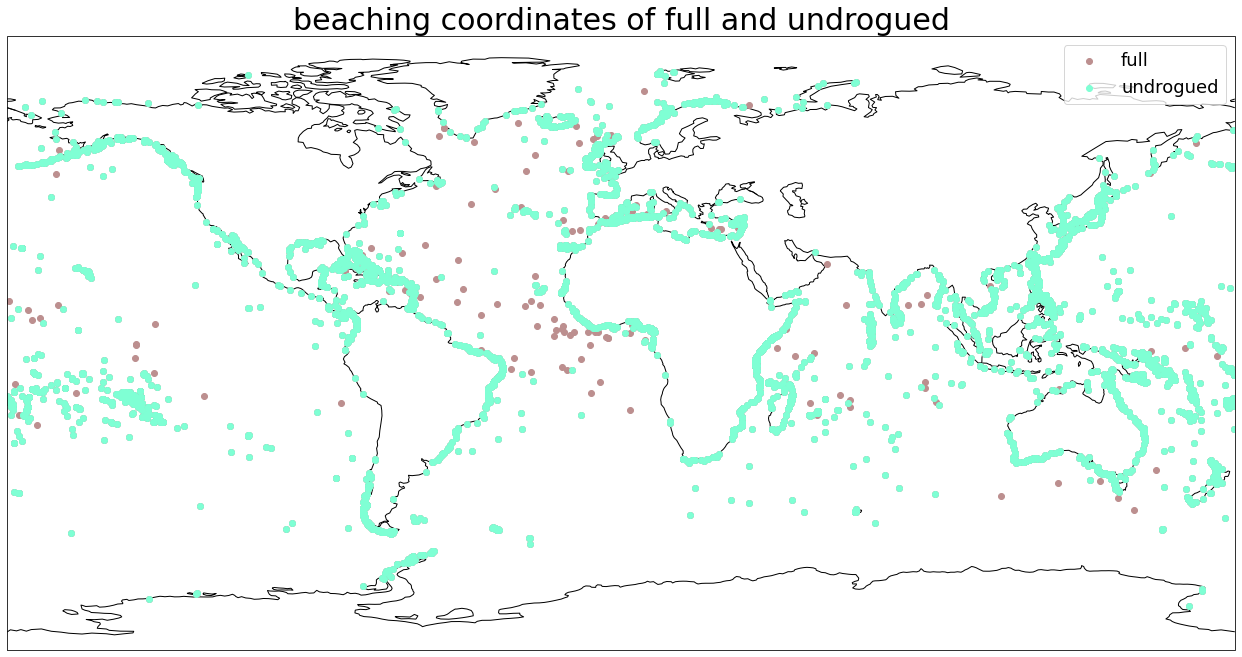

In [13]:
# plot beaching coordinates of drogued and undrogued:
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()

scatter1 = plt.scatter(last_beach_full['lon'],last_beach_full['lat'], label = 'full', c = 'rosybrown')
scatter2 = plt.scatter(last_beach_undrogued['lon'],last_beach_undrogued['lat'], label = 'undrogued', c= 'aquamarine')

ax.legend(loc='best')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('beaching coordinates of full and undrogued')
plt.show()

This figure plots the beaching coordinates of all drifters (full set), then plots the beaching coordinates of undrogued drifters over them. The remaining brown-red ‘full’ points indicate the beaching coordinates of trajectories that do not become undrogued, i.e., they beach with their drogue. As you can see, this is a small set of the data and most look like errors.\
\
Let's now calculate the number of drogued drifters that beach, bearing in mind that much of these will be errors:

In [22]:
beach_drogue_unique = last_beach_drogue[~last_beach_drogue['id'].isin(last_beach_undrogued['id'])]

drifters that beach with their drogue: 141


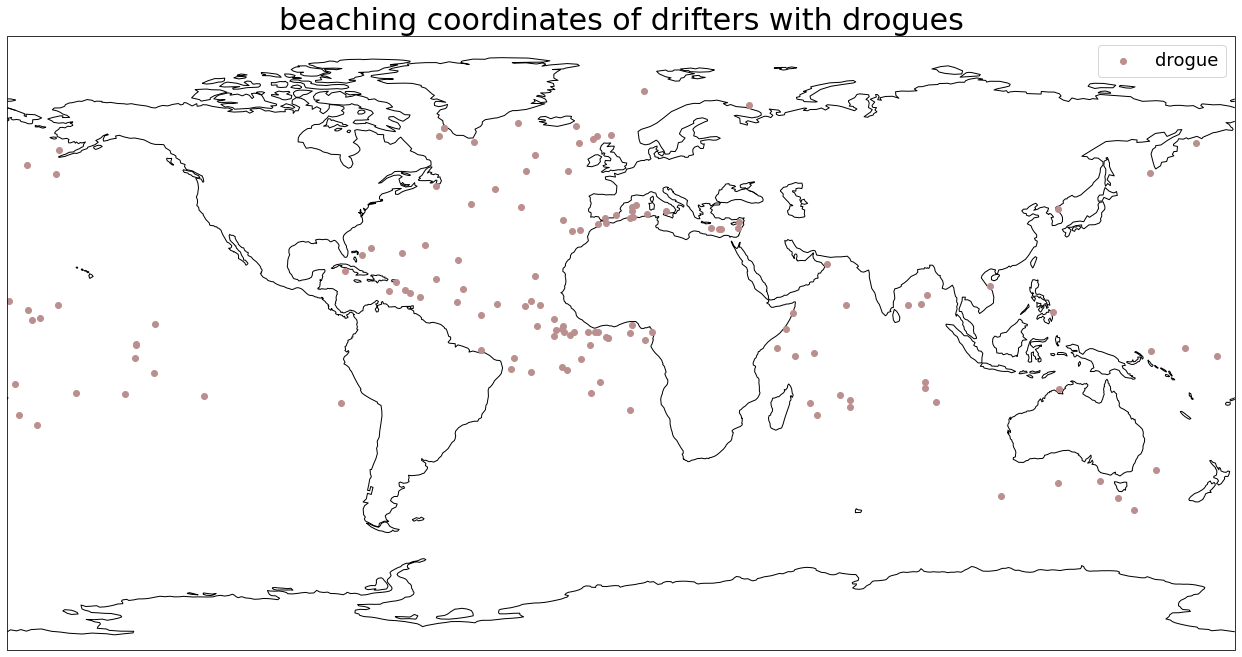

In [29]:
# plot beaching coordinates of drogued:
print(f'drifters that beach with their drogue: {len(beach_drogue_unique)}')
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()

scatter1 = plt.scatter(beach_drogue_unique['lon'],beach_drogue_unique['lat'], label = 'drogue', c = 'rosybrown')
ax.legend(loc='best')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('beaching coordinates of drifters with drogues')
plt.show()

In [33]:
len(last_beach_undrogued)

4252